## Importing necessary modules and libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

## Reading the train and test datasets

In [2]:
# importing drive, comment out the next two lines if running on local device
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
DATA_PATH='./drive/My Drive/Assignment1/data/' # replace with Data Path before execution
train_file=pd.read_pickle(DATA_PATH + "train.pkl")
test_file=pd.read_pickle(DATA_PATH + "test.pkl")

## Visualising the given dataset

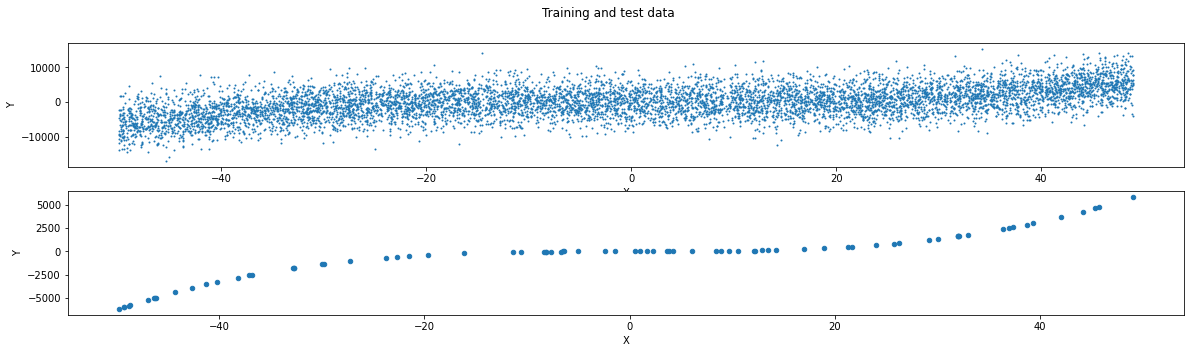

In [4]:
df_train = pd.DataFrame(train_file, columns=["X", "Y"])
df_test = pd.DataFrame(test_file, columns=["X", "Y"])
plt.rcParams["figure.figsize"] = (20, 5)
fig, axs = plt.subplots(2)
fig.suptitle('Training and test data')
df_train.plot.scatter(x = "X", y='Y', s=1, ax=axs[0])
df_test.plot.scatter(x = "X", y='Y', ax=axs[1])
plt.show()

## Visualising the training sets after splitting

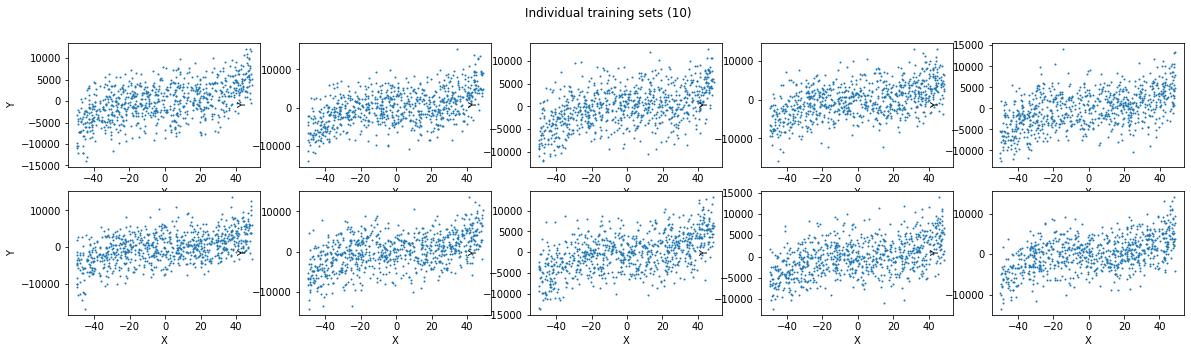

In [5]:
shuffled_train = df_train.sample(frac=1)
final_train = np.array_split(shuffled_train,10)
plt.rcParams["figure.figsize"] = (20, 5)
fig, axs = plt.subplots(2, 5)
fig.suptitle('Individual training sets (10)')
for i in range(10):
  final_train[i].plot.scatter(x = "X", y='Y', s=1, ax=axs[int(i/5)][i%5])
plt.show()

## Making models for the polynomial regression

In [6]:
def polyModel (deg, X, Y):
  poly = make_pipeline(PolynomialFeatures(degree=deg, include_bias=False, interaction_only=False), LinearRegression())

  X = np.array(X).reshape(-1, 1)
  Y = np.array(Y).reshape(-1, 1)

  poly.fit(X, Y)
  return poly

## Calculating Bias and Variance and tabulating them:

In [7]:
test_X = np.array(df_test['X']).reshape(-1,1)
test_Y = np.array(df_test['Y']).reshape(-1,1)

final_list = []
final_bias_var=[]
final_sec=[]

for i in range(20):
  deg = i+1


  exp_val = np.zeros([80,1])

  for j in range(10):
    model = polyModel(deg, final_train[j]['X'], final_train[j]['Y'])
    exp_val += model.predict(test_X)
  
  exp_val/=10
  current_bias=exp_val-test_Y


  var_val = np.zeros([80,1])

  for j in range(10):
    model = polyModel(deg, final_train[j]['X'], final_train[j]['Y'])
    var_val+= (model.predict(test_X) -exp_val) ** 2

  var_val/=10


  temp_bias_square = (current_bias.flatten())**2
  temp_var = var_val.flatten()

  data = {"Bias Squares":temp_bias_square, "Variance": temp_var}
  final=pd.DataFrame(data)
  final_list.append(final)
  
  average_bias_square = np.mean(temp_bias_square)
  average_var = np.mean(temp_var)
  temp_element=[deg, average_bias_square, average_var]
  final_bias_var.append(temp_element)

  average_bias = np.mean(current_bias.flatten())
  temp_element=[deg, average_bias, average_var]
  final_sec.append(temp_element)
  

df_final_sec=pd.DataFrame(final_sec, columns=['Degree', 'Bias', 'Variance'])
df_final_sec

,Degree,Bias,Variance
0,1,232.023735,23362.566426
1,2,227.239604,29314.517425
2,3,-14.314984,46281.894697
3,4,-11.557387,69222.235720
4,5,-12.391718,92316.571850
5,6,-14.543091,99856.759590
6,7,-13.423292,115392.303870
7,8,-23.614489,131197.765589
8,9,-21.688565,150246.704340
9,10,-21.660066,148144.495432


## Tabulating Bias Square and Variance

In [8]:
df_final_bias_var=pd.DataFrame(final_bias_var, columns=['Degree', 'Bias Square', 'Variance'])
df_final_bias_var

,Degree,Bias Square,Variance
0,1,1.002275e+06,23362.566426
1,2,9.538554e+05,29314.517425
2,3,9.883234e+03,46281.894697
3,4,9.484724e+03,69222.235720
4,5,8.903898e+03,92316.571850
5,6,8.924428e+03,99856.759590
6,7,9.750390e+03,115392.303870
7,8,1.165098e+04,131197.765589
8,9,1.081705e+04,150246.704340
9,10,1.378042e+04,148144.495432


## Calculating the Mean Square Error (MSE):

In [9]:
list_mse=[]

for i in range(20):
  deg = i + 1

  temp_list = np.zeros([80,1])

  for j in range(10):
    model = polyModel(deg, final_train[j]['X'], final_train[j]['Y'])
    temp_mse=(model.predict(test_X) - test_Y) ** 2
    temp_list+=temp_mse

  temp_list/=10
  deg_mse=np.mean(temp_list.flatten())

  temp_element=[deg, deg_mse]
  list_mse.append(temp_element)
  
df_list_mse=pd.DataFrame(list_mse, columns=['Degree', 'MSE'])
df_list_mse

,Degree,MSE
0,1,1.025638e+06
1,2,9.831700e+05
2,3,5.616513e+04
3,4,7.870696e+04
4,5,1.012205e+05
5,6,1.087812e+05
6,7,1.251427e+05
7,8,1.428487e+05
8,9,1.610638e+05
9,10,1.619249e+05



## Calulating Irreducible Error and tabulating the same:


In [10]:
ire_list = df_list_mse['MSE']-(df_final_bias_var['Variance'] + df_final_bias_var['Bias Square'])

degrees=list(range(1,21))

df_ire= pd.DataFrame(degrees, columns=['Degree'])
df_ire['Irreducible Error']=ire_list

df_ire

,Degree,Irreducible Error
0,1,0.000000e+00
1,2,1.164153e-10
2,3,1.455192e-11
3,4,-1.455192e-11
4,5,-2.910383e-11
5,6,-1.455192e-11
6,7,1.455192e-11
7,8,0.000000e+00
8,9,-2.910383e-11
9,10,-2.910383e-11


## Plotting the Bias Square and Variance, versus the Degree

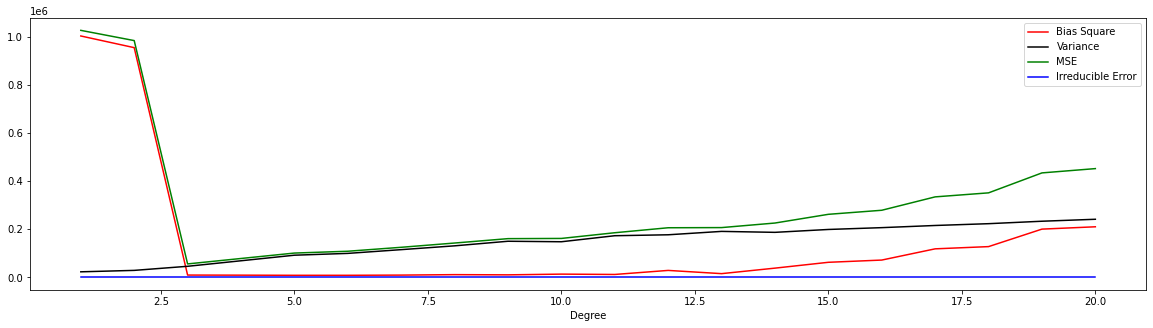

In [11]:
plt.rcParams["figure.figsize"] = (20, 5)
ax1 = df_final_bias_var.plot(x = "Degree", y='Bias Square', color="red", kind='line')
ax2 = df_final_bias_var.plot(x = "Degree", y='Variance', color="black", kind='line', ax=ax1)
ax3 = df_list_mse.plot(x = "Degree", y='MSE', color="green", kind='line', ax=ax1)
ax4 = df_ire.plot(x = "Degree", y='Irreducible Error', color="blue", kind='line', ax=ax1)
plt.show()